In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

DFF = pd.read_csv('DFF.csv')
DFF['DATE'] = pd.to_datetime(DFF['DATE'])
DFF.head()

,DATE,DFF
0,2014-09-13,0.09
1,2014-09-14,0.09
2,2014-09-15,0.09
3,2014-09-16,0.09
4,2014-09-17,0.09


In [30]:
UNR = pd.read_csv('UNRATE.csv')
UNR['DATE'] = pd.to_datetime(UNR['DATE'])
UNR.head()

,DATE,UNRATE
0,2014-08-01,6.1
1,2014-09-01,5.9
2,2014-10-01,5.7
3,2014-11-01,5.8
4,2014-12-01,5.6


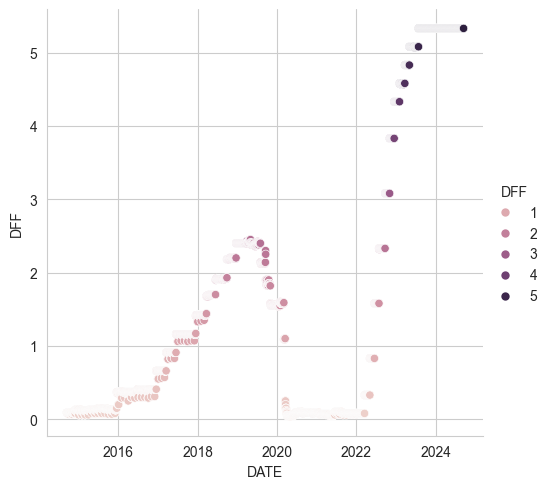

In [31]:
sns.set_style("whitegrid")
sns.relplot(x='DATE', y='DFF', data=DFF, hue='DFF',)

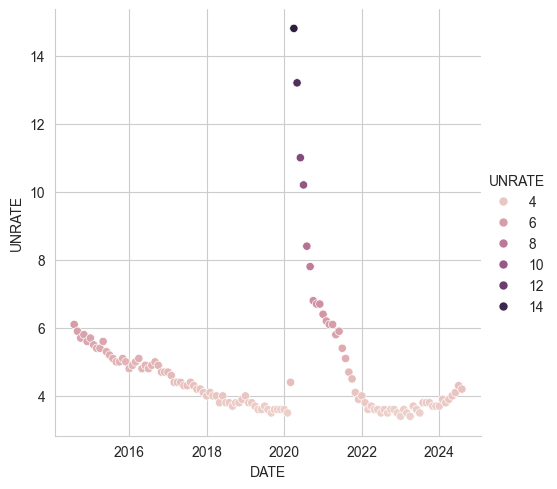

In [32]:
sns.set_style("whitegrid")
sns.relplot(x='DATE', y='UNRATE', data=UNR, hue='UNRATE')

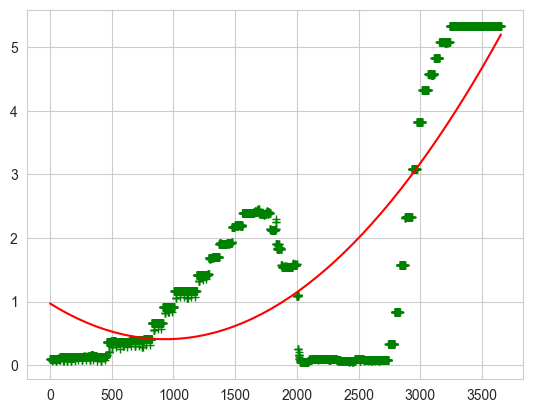

In [33]:
date = DFF.DATE.values
date = (DFF['DATE'] - DFF['DATE'].min()).dt.days.values
ffr = DFF.DFF.values

ins_reg = np.polyfit(date, ffr, 2)
g = np.poly1d(ins_reg)

x = np.linspace(min(date),max(date))
y = g(x)

plt.plot(date, ffr, "g+")
plt.plot(x, y, "r")

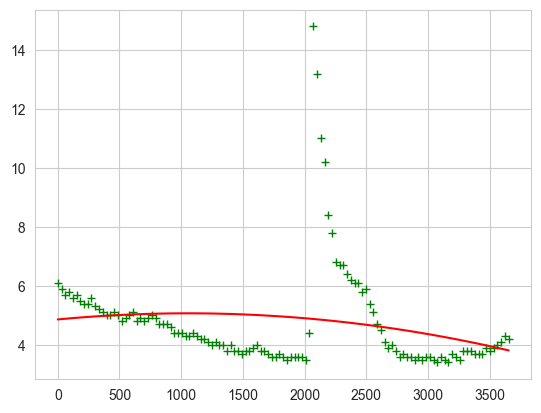

In [34]:
date = UNR.DATE.values
date = (UNR['DATE'] - UNR['DATE'].min()).dt.days.values
unemp = UNR.UNRATE.values

ins_reg = np.polyfit(date, unemp, 2)
g = np.poly1d(ins_reg)

x = np.linspace(min(date),max(date))
y = g(x)

plt.plot(date, unemp, "g+")
plt.plot(x, y, "r")

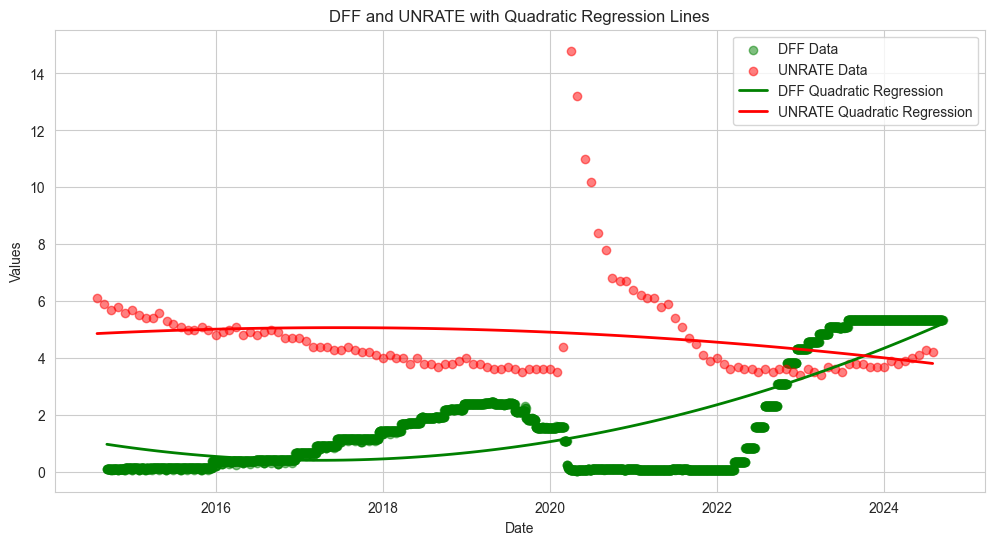

In [35]:
date = DFF.DATE.values
ffr = DFF.DFF.values

ins_reg_dff = np.polyfit((DFF['DATE'] - DFF['DATE'].min()).dt.days.values, ffr, 2)
g_dff = np.poly1d(ins_reg_dff)

date_unr = UNR.DATE.values
unemp = UNR.UNRATE.values

ins_reg_unr = np.polyfit((UNR['DATE'] - UNR['DATE'].min()).dt.days.values, unemp, 2)
g_unr = np.poly1d(ins_reg_unr)

x_dff = np.linspace(min((DFF['DATE'] - DFF['DATE'].min()).dt.days.values), max((DFF['DATE'] - DFF['DATE'].min()).dt.days.values), 100)
y_dff = g_dff(x_dff)

x_unr = np.linspace(min((UNR['DATE'] - UNR['DATE'].min()).dt.days.values), max((UNR['DATE'] - UNR['DATE'].min()).dt.days.values), 100)
y_unr = g_unr(x_unr)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(DFF['DATE'], ffr, color='green', label='DFF Data', alpha=0.5)
plt.scatter(UNR['DATE'], unemp, color='red', label='UNRATE Data', alpha=0.5)
plt.plot(DFF['DATE'].min() + pd.to_timedelta(x_dff, unit='D'), y_dff, color='green', linewidth=2, label='DFF Quadratic Regression')
plt.plot(UNR['DATE'].min() + pd.to_timedelta(x_unr, unit='D'), y_unr, color='red', linewidth=2, label='UNRATE Quadratic Regression')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('DFF and UNRATE with Quadratic Regression Lines')
plt.legend()
plt.show()